# Predict Breast Cancer Machine Learning Project
# Projeto Machine Learning para prever Câncer de Mama

In [2]:
# Import the libraries
# Importando as bibliotecas
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Loading the Data
# Carregando os dados 
import os

PATH = os.path.join("datasets", "breast_cancer_data")

def load_data(path=PATH):
    csv_path = os.path.join(path, "data.csv")
    return pd.read_csv(csv_path)

In [11]:
cancer_data = load_data()

# Drop indifferent or null columns
# Excluir colunas com valores indiferentes ou nulos

cancer_data = cancer_data.drop(['Unnamed: 32','id'], axis = 1)

# Visualization of the head data
# Visualização do início dos dados

cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

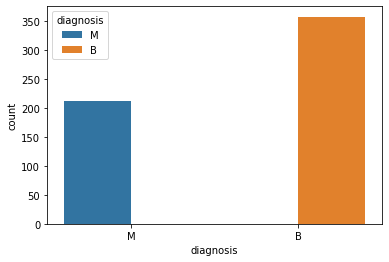

In [12]:
# Visualization of diagnosis
# Visualização do diagnóstico

sns.countplot(data = cancer_data, x='diagnosis', hue='diagnosis')

In [17]:
# Encode the categorical data values
# Codificar os dados que são categóricos

from sklearn.preprocessing import LabelEncoder

cancer_data.iloc[:,0] = LabelEncoder().fit_transform(cancer_data.iloc[:,0].values)

### -Benign cancer = 0; Malignant Cancer = 1
### -Câncer Benigno = 0; Câncer Maligno = 1

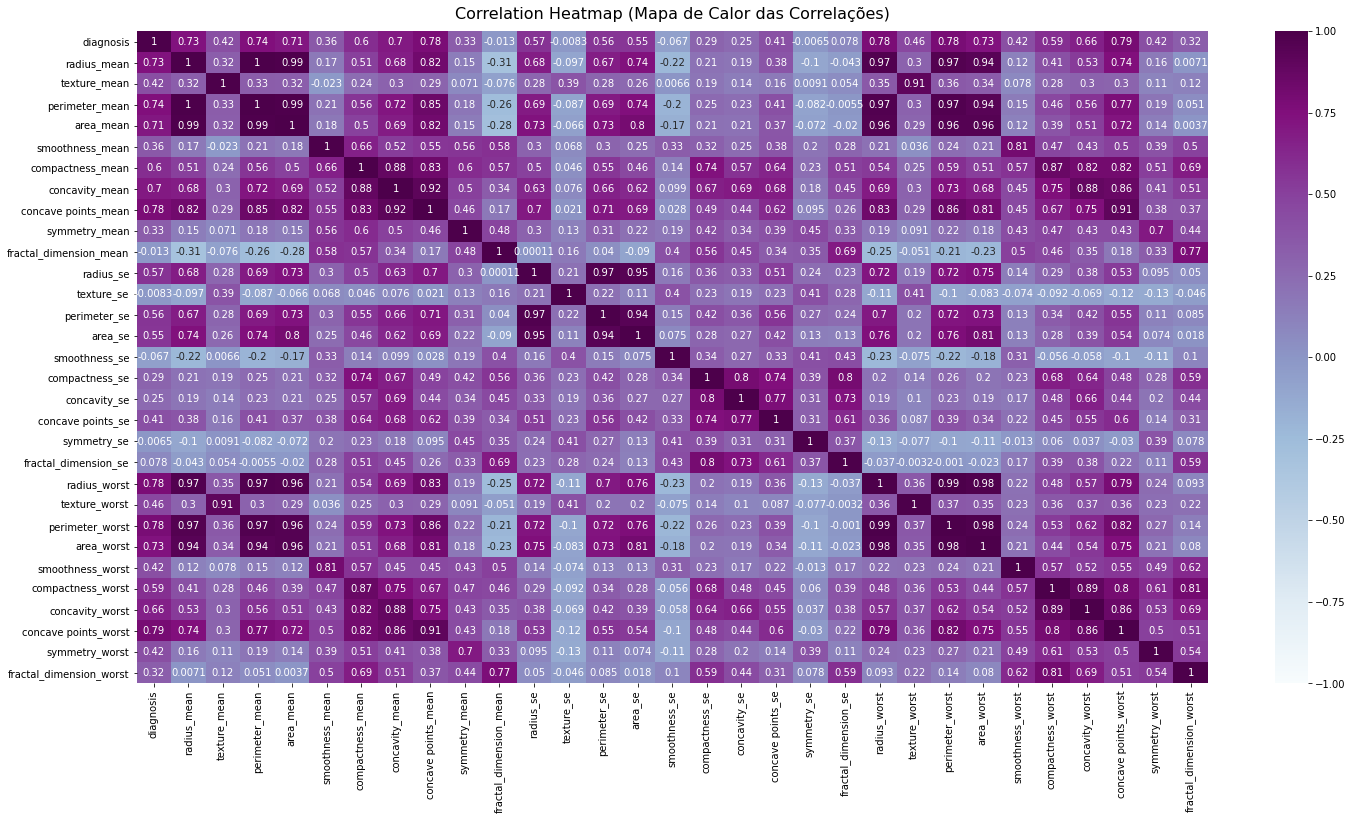

In [26]:
# Find the correlation of the columns (inputs)
# Achar a correção entre as colunas (entradas)

plt.figure(figsize=(24,12))
heatmap = sns.heatmap(cancer_data.corr(), vmin=-1, vmax=1, annot=True, cmap="BuPu")
heatmap.set_title('Correlation Heatmap (Mapa de Calor das Correlações)', fontdict={'fontsize':16}, pad=12);

In [53]:
# Split the data in independent (X) and dependent (Y) values
# Separar os dados em valores independentes (X) e dependentes (Y)

X = cancer_data.iloc[:,1:31].values
Y = cancer_data.iloc[:,0].values

In [54]:
# Split the dataset in training (75%) and testing (25%)
# Separar o dataset em treinamento (75%) e teste (25%)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [55]:
# Scaling the data for same magnitude
# Normalizando os dados para a mesma magnitude 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

In [93]:
# Create a Function to detect the cancer using Random Forest
# Criando uma função para detectar o câncer usando Random Forest

def models(X_train, Y_train):
    
    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
    forest.fit(X_train, Y_train)
    
    #Print the accuracy model on the training data
    print('Random Forest Training Accuracy:', forest.score(X_train, Y_train))
    
    return forest

In [94]:
# Determinate the accuracy of the the model on the training data
# Determinar a precisão do modelo nos dados de treino

model = models(X_train, Y_train)

Random Forest Training Accuracy: 0.9976525821596244


### Cm0,0 = True Negatives
### Cm1,0 = False Negatives
### Cm1,1 = True Positives
### Cm0,1 = False Positives

In [95]:
#Use the testing data to determinate the accuracy of the model with new inputs
#Usar os dados de teste para determinar a precisão do modelo com novas entradas

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, model.predict(X_test))

TN,FN = cm[0][0], cm[1][0]
TP,FP = cm[1][1], cm[0][1]

accuracy = (TP+TN)/(TP+TN+FN+FP)
accuracy = round(accuracy*100,2)

print("The accuracy is approximately",accuracy,"%")

The accuracy is approximately 97.9 %
